c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold Accuracy: 33.64%


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold Accuracy: 33.78%


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold Accuracy: 28.17%


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold Accuracy: 31.10%


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold Accuracy: 31.31%

Mean Cross-Validation Accuracy: 31.60% ± 2.05%
Epoch 1/50


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0826 - loss: 2.5181 - val_accuracy: 0.1008 - val_loss: 2.4775
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1296 - loss: 2.4463 - val_accuracy: 0.1151 - val_loss: 2.4531
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1450 - loss: 2.4164 - val_accuracy: 0.1253 - val_loss: 2.4402
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1586 - loss: 2.3844 - val_accuracy: 0.1283 - val_loss: 2.4269
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1809 - loss: 2.3579 - val_accuracy: 0.1548 - val_loss: 2.4012
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1955 - loss: 2.3307 - val_accuracy: 0.1477 - val_loss: 2.3903
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2065 - loss: 2.3001 - val_accuracy: 0.1690 - val_loss: 2.3748
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2259 - loss: 2.2744 - val_accuracy: 0.1802 - val_

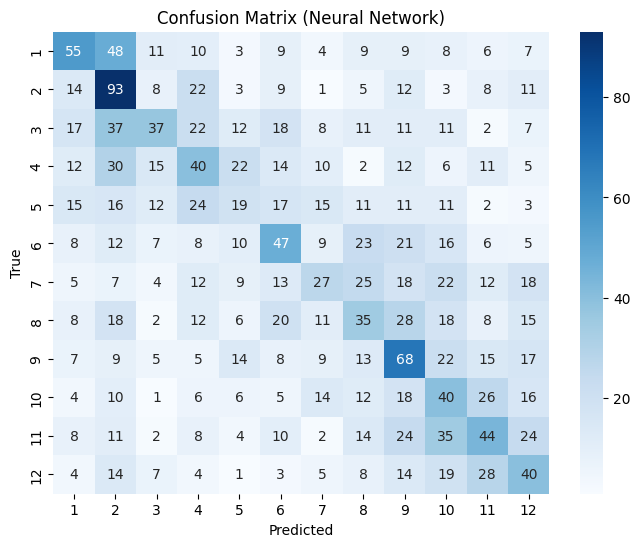

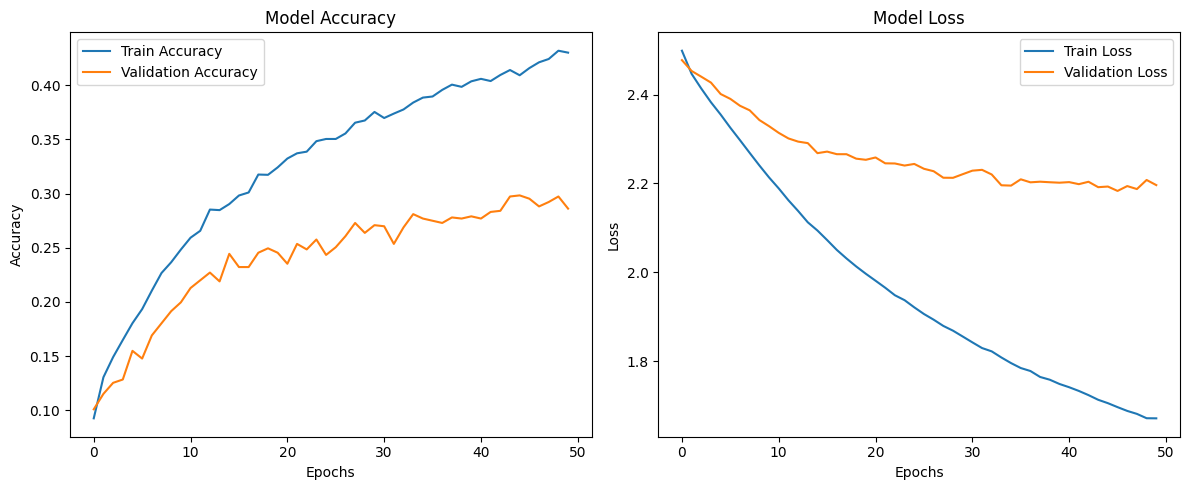


Summary of Results:
                           Metric      Value Std Dev (CV)
0  Mean Cross-Validation Accuracy  31.602364     2.050129
1                   Test Accuracy  25.903042            -


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('LDA.csv')  # Update the file path if needed

# Step 2: Define features (X) and target labels (y)
X = data.drop('target', axis=1)  # Replace 'target_column' with your target column name
y = data['target']  # Extract the target column as the label

# Encode target labels (convert categorical labels to integers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the target labels for NN
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Step 3: Apply LDA to reduce dimensionality
lda = LinearDiscriminantAnalysis(n_components=None)  # Classes - 1 components by default
X_lda = lda.fit_transform(X, label_encoder.inverse_transform(y_onehot.argmax(axis=1)))

# Step 4: Build the Neural Network Model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 1
        tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
        tf.keras.layers.Dense(y_onehot.shape[1], activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Cross-validation using StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = []

for train_index, val_index in kf.split(X_lda, y_encoded):
    X_train, X_val = X_lda[train_index], X_lda[val_index]
    y_train, y_val = y_onehot[train_index], y_onehot[val_index]

    # Build and train the model
    model = build_model(X_train.shape[1:])
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    y_val_pred_probs = model.predict(X_val)
    y_val_pred = y_val_pred_probs.argmax(axis=1)
    y_val_labels = y_val.argmax(axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_val_labels, y_val_pred) * 100
    cv_accuracy.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.2f}%")

# Calculate the mean and standard deviation of cross-validation accuracies
mean_cv_accuracy = np.mean(cv_accuracy)
std_cv_accuracy = np.std(cv_accuracy)
print(f"\nMean Cross-Validation Accuracy: {mean_cv_accuracy:.2f}% ± {std_cv_accuracy:.2f}%")

# Step 6: Final evaluation on the test set
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_lda, y_onehot, test_size=0.3, random_state=42)

model = build_model(X_train_final.shape[1:])
history = model.fit(X_train_final, y_train_final, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Step 7: Evaluate the final model on the test set
y_test_pred_probs = model.predict(X_test_final)
y_test_pred = y_test_pred_probs.argmax(axis=1)
y_test_labels = y_test_final.argmax(axis=1)

test_accuracy = accuracy_score(y_test_labels, y_test_pred) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Classification Report
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:\n", classification_report(y_test_labels, y_test_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Neural Network)')
plt.show()

# Step 8: Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Summary Table for Cross-Validation and Test Results
results = {
    'Metric': ['Mean Cross-Validation Accuracy', 'Test Accuracy'],
    'Value': [mean_cv_accuracy, test_accuracy],
    'Std Dev (CV)': [std_cv_accuracy, '-']
}

summary_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary_df)
